In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from neo.rawio import AxonRawIO
from matplotlib.colors import TwoSlopeNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import math
import os

In [2]:
output_loc = '//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Output'
plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.width'] = 0.5
color = ['#2E3191','#EC1C24']
fonts = {"font.size":6, "axes.labelsize":6, "ytick.labelsize":6, "xtick.labelsize":6}
plt.rcParams.update(fonts)

### Data import

In [3]:
data_loc = os.chdir('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Ingenuity')
def import_data(data_loc):
    #plcb4data
    plcb4_data = pd.read_excel('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets/PLCB4_pathwaydata.xls')
    
    aldoc_data = pd.read_excel('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets/Aldoc_pathwaydata.xls')
    return plcb4_data, aldoc_data

In [4]:
plcb4_data, aldoc_data = import_data(data_loc)
plcb4_data = plcb4_data.fillna(0)
aldoc_data = aldoc_data.fillna(0)

In [5]:
plcb4_data

,Ingenuity Canonical Pathways,-log(p-value),Ratio,z-score,Molecules
0,Neurovascular Coupling Signaling Pathway,6.70,0.0517,2.887,"ABHD3,CACNA2D2,Calm1 (includes others),GABRB2,..."
1,Dopamine-DARPP32 Feedback in cAMP Signaling,5.83,0.0538,2.121,"ADCY8,CACNA2D2,Calm1 (includes others),GNAI1,G..."
2,Synaptogenesis Signaling Pathway,5.31,0.0381,3.162,"ADCY8,CACNA2D2,Calm1 (includes others),CDH13,C..."
3,Endocannabinoid Neuronal Synapse Pathway,4.76,0.0537,2.121,"ADCY8,CACNA2D2,GNAI1,GRIN2A,GRM1,KCNJ3,PLCB1,P..."
4,Synaptic Long Term Depression,4.71,0.0455,2.333,"ABHD3,CACNA2D2,GNAI1,GRM1,IGF1,PLCB1,PLCB4,PPM..."
5,Axonal Guidance Signaling,4.49,0.0275,0.000,"ADAMTS3,EFNA5,GNAI1,IGF1,ITGA1,LRRC4C,NTNG1,PA..."
6,Synaptic Long Term Potentiation,4.20,0.0530,2.646,"ADCY8,Calm1 (includes others),GRIN2A,GRM1,PLCB..."
7,GNRH Signaling,4.00,0.0419,2.449,"ADCY8,CACNA2D2,Calm1 (includes others),GNAI1,P..."
8,PPARα/RXRα Activation,3.93,0.0410,0.000,"ADCY8,GHR,IL1RAP,IL1RAPL1,PLCB1,PLCB4,PPARGC1A..."
9,Melatonin Signaling,3.68,0.0694,2.236,"Calm1 (includes others),GNAI1,PLCB1,PLCB4,PRKCA"


In [6]:
aldoc_data

,Ingenuity Canonical Pathways,-log(p-value),Ratio,z-score,Molecules
0,Opioid Signaling Pathway,10.10,0.0643,2.840,"CACNA1C,CACNA1D,CAMK2D,CAMK4,GNAL,GNAO1,GNAQ,G..."
1,Calcium Signaling,7.00,0.0591,3.000,"CACNA1C,CACNA1D,CAMK2D,CAMK4,GRIA1,HDAC7,HDAC9..."
2,Circadian Rhythm Signaling,6.84,0.0522,0.000,"CACNA1C,CACNA1D,CAMK2D,GNAQ,GNG13,GNG2,GRIA1,P..."
3,Synaptogenesis Signaling Pathway,6.76,0.0476,3.873,"CADM1,CAMK2D,CDH10,CDH11,CDH12,CDH18,EPHA5,EPH..."
4,GABA Receptor Signaling,6.50,0.0758,0.000,"CACNA1C,CACNA1D,GABBR2,GNAL,GNAO1,GNAQ,GNG13,G..."
5,Axonal Guidance Signaling,6.07,0.0353,0.000,"ABLIM3,EPHA5,EPHA6,EPHA7,EPHB2,GNAL,GNAO1,GNAQ..."
6,Endocannabinoid Neuronal Synapse Pathway,6.01,0.0671,3.000,"CACNA1C,CACNA1D,GNAL,GNAO1,GNAQ,GNG13,GNG2,GRI..."
7,Synaptic Long Term Depression,5.75,0.0556,2.714,"CACNA1C,CACNA1D,GNAL,GNAO1,GNAQ,GRIA1,PLCB3,PP..."
8,Synaptic Long Term Potentiation,5.52,0.0682,1.890,"CACNA1C,CAMK2D,CAMK4,GNAQ,GRIA1,PLCB3,PPP1R14B..."
9,Netrin Signaling,5.43,0.0972,2.646,"ABLIM3,CACNA1C,CACNA1D,PPP3CA,RYR1,RYR2,UNC5D"


### Data normalization

In [7]:
#Maybe unnecessary?

### Plotting -log(p-value) + z-score as hue (figure 3)

In [8]:
def pathway_plot(data):
    zscore = data['z-score']
    norm = TwoSlopeNorm(vmin=zscore.min(), vcenter=0, vmax=zscore.max())
    sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=norm)
    sm.set_array([])

    fig, ax = plt.subplots()
    ax.bar(x='Ingenuity Canonical Pathways', height=' -log(p-value)', data=data, color=sm.to_rgba(zscore), edgecolor='black', 
           lw=0.5)
    cbar = plt.colorbar(sm, label='z-score')
    plt.xticks(rotation=90)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #aesthetics plcb4
    #ax.set_xlim(-.5,39.5)
    #ax.set_ylim(0,8)
    #ax.set_title('Plcb4+ predicted pathways')
    #aesthetics aldoc
    ax.set_xlim(-.5,47.5)
    ax.set_ylim(0,12)
    
    ax.set_ylabel('-log(p-value)')
    fig.tight_layout()
    fig.savefig(os.path.join(output_loc, 'pathway_plot2.png'), dpi=600)
    return fig, ax

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:ylabel='-log(p-value)'>)

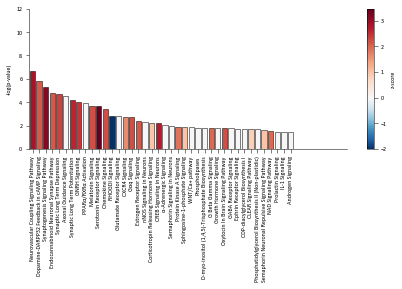

In [9]:
pathway_plot(plcb4_data)

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:ylabel='-log(p-value)'>)

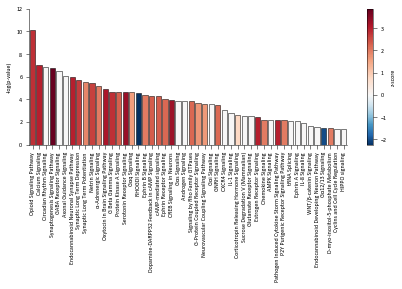

In [10]:
pathway_plot(aldoc_data)

### Plotting raw gene data (figure 2)

In [11]:
def gene_plot():
    data = pd.read_excel('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets/genelist1.xlsx')
    data = data.drop('avg_logFC', axis=1)
    data = data.drop('pct.1', axis=1)
    data = data.drop('pct.2', axis=1)
    data = data.drop('p_val_adj', axis=1)
    
    #data = data.sort_values('Plcb4+', axis=0)
    data = data.set_index('Gene')
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    print(data)
    aldoc_data = data.loc[data['Aldoc+'] > data['Plcb4+']]
    plcb_data = data.loc[data['Plcb4+'] > data['Aldoc+']]
    fig, ax = plt.subplots(1,2, figsize=(1.5,8))
    #cax = inset_axes(ax,
                # width="100%",  # width: 40% of parent_bbox width
                # height="2%",  # height: 10% of parent_bbox height
                # loc='lower left',
                # bbox_to_anchor=(0, 1.10, 1, 1),
                # bbox_transform=ax.transAxes,
                # borderpad=0,)
    sns.heatmap(aldoc_data,cmap='Blues', ax=ax[0], vmin=0,
                cbar_kws={'orientation': 'horizontal'})
    sns.heatmap(plcb_data,cmap='Reds', ax=ax[1], vmin=0,
                cbar_kws={'orientation': 'horizontal'})
    
    ax[0].set_frame_on(True)
    ax[0].get_yaxis().set_ticks([])
    ax[0].set_ylabel(' ')
    #ax[0].set_xticklabels([''])
    ax[0].get_xaxis().set_visible(False)
    ax[1].set_frame_on(True)
    ax[1].get_yaxis().set_ticks([])
    ax[1].set_ylabel(' ')
    #ax[1].set_xticklabels([''])
    ax[1].get_xaxis().set_visible(False)
    
    
    fig.tight_layout()
    fig.savefig(os.path.join(output_loc, 'all_genes_heatplot.pdf'), bbox_inches='tight')
    return fig, ax

         Aldoc+  Plcb4+
Gene                   
Mpped2    1.605   0.118
Gm12682   1.733   0.312
Gm32647   1.779   0.388
Epha5     2.616   1.375
Nlgn1     2.604   1.397
...         ...     ...
Ints6     1.020   1.258
Eif2ak3   0.397   0.692
Gm26713   1.982   2.208
Nxph1     0.148   0.396
Cdh8      0.357   0.572

[475 rows x 2 columns]


(<Figure size 108x576 with 4 Axes>,
 array([<AxesSubplot:ylabel=' '>, <AxesSubplot:ylabel=' '>], dtype=object))

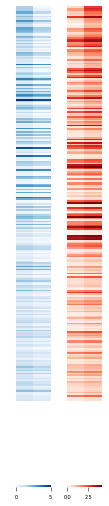

In [12]:
gene_plot()

In [38]:
def zoomed_gene_plot():
    data = pd.read_excel('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets/genelist1.xlsx')
    data = data.drop('avg_logFC', axis=1)
    data = data.drop('pct.1', axis=1)
    data = data.drop('pct.2', axis=1)
    data = data.drop('p_val_adj', axis=1)
    
    data = data.set_index('Gene')
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
    print(data)
    aldoc_data = data.loc[data['Aldoc+'] > data['Plcb4+']]
    plcb_data = data.loc[data['Plcb4+'] > data['Aldoc+']]
    fig, ax = plt.subplots(1,2, figsize=(1.0,3.0))
    sns.heatmap(plcb_data[0:25],cmap='Reds', ax=ax[0], vmin=0, annot=False, annot_kws={'color':'black'}, cbar=False,
               cbar_kws = {'use_gridspec':False, 'location':'top','ticks':[0, 3.75]})
    
    sns.heatmap(aldoc_data[0:25],cmap='Blues', ax=ax[1], vmin=0, annot=False, annot_kws={'color':'white'}, cbar=False,
               cbar_kws = {'use_gridspec':False, 'location':'top','ticks':[0, 3.05]})

    for a in ax.flatten():
        a.set_ylabel('')
        a.tick_params(axis='x', which='both', bottom=False)
        a.tick_params(axis='y', which='both', left=False)
        a.tick_params(axis='y', which='both', right=False)
        a.set_xticklabels(['Aldoc+','Plcb4+'], rotation = 45, ha='right')
    ax[1].yaxis.set_label_position('right')
    ax[1].tick_params(axis='y', which='both', right=False)
    ax[1].yaxis.tick_right()
    ax[0].invert_xaxis()
    ax[1].invert_xaxis()
    plt.setp(ax[0].yaxis.get_majorticklabels(), rotation=0)
    plt.setp(ax[1].yaxis.get_majorticklabels(), rotation=0)
    #fig.tight_layout()
    fig.savefig(os.path.join(output_loc, 'zoomed_genes_heatplot.pdf'), bbox_inches='tight')
    return fig, ax

         Aldoc+  Plcb4+
Gene                   
Mpped2    1.605   0.118
Gm12682   1.733   0.312
Gm32647   1.779   0.388
Epha5     2.616   1.375
Nlgn1     2.604   1.397
...         ...     ...
Ints6     1.020   1.258
Eif2ak3   0.397   0.692
Gm26713   1.982   2.208
Nxph1     0.148   0.396
Cdh8      0.357   0.572

[475 rows x 2 columns]


(<Figure size 72x216 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

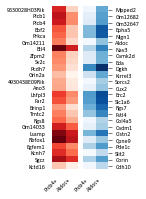

In [39]:
zoomed_gene_plot()

In [15]:
#Might be useful as supplemental material?
#idea is to have relative zscore (i.e. pathway activation) plotted Aldoc group vs Plcb4 group. So overalapping and 
#non overlapping pathways
def pathway_plot_spec(aldoc, plcb4):
    #getting rid of all the stuff I don't need
    aldoc = aldoc.set_index('Ingenuity Canonical Pathways')
    aldoc = aldoc.drop(' -log(p-value)', axis=1)
    aldoc = aldoc.drop('Ratio', axis=1)
    aldoc = aldoc.drop('Molecules', axis=1)
    
    plcb4 = plcb4.set_index('Ingenuity Canonical Pathways')
    plcb4 = plcb4.drop(' -log(p-value)', axis=1)
    plcb4 = plcb4.drop('Ratio', axis=1)
    plcb4 = plcb4.drop('Molecules', axis=1)
    #Renaming the z-score of one column for the merge
    plcb4 = plcb4.rename(columns={'z-score':'z-score_plcb4'})
    
    #combined_df = pd.merge(aldoc, plcb4, left_index=True, right_index=True)
    combined_df = pd.concat([aldoc, plcb4], axis=1)
    combined_df = combined_df.fillna(0)
    
    fig, ax = plt.subplots(figsize=(1,10))
    sns.heatmap(data=combined_df[0:20], cmap='RdBu_r', center=0, edgecolor='black', lw=0.5, 
                cbar_kws={'label':'Z-score'})

    ax.set_ylabel(' ')
    #ax.set_xticklabels([''])
    fig.savefig(os.path.join(output_loc, 'all_pathways_heatplot.pdf'),dpi=600, bbox_inches='tight')
    return combined_df

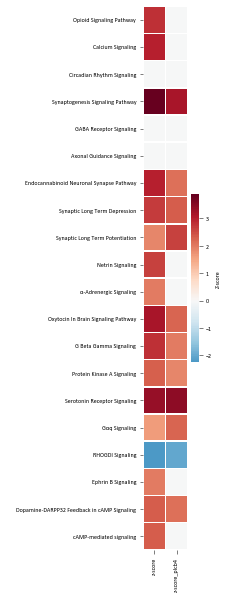

In [16]:
a = pathway_plot_spec(aldoc_data, plcb4_data)

In [17]:
a

,z-score,z-score_plcb4
Ingenuity Canonical Pathways,,
Opioid Signaling Pathway,2.840,0.000
Calcium Signaling,3.000,0.000
Circadian Rhythm Signaling,0.000,0.000
Synaptogenesis Signaling Pathway,3.873,3.162
GABA Receptor Signaling,0.000,0.000
...,...,...
CLEAR Signaling Pathway,0.000,0.816
Phosphatidylglycerol Biosynthesis II (Non-plastidic),0.000,0.000
Semaphorin Neuronal Repulsive Signaling Pathway,0.000,1.000


### Plotting specific LTD pathway data (figure 4)

In [18]:
def LTD_gene_plot():
    aldoc_data = pd.read_excel('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets/Aldoc_ltddata.xls')
    plcb4_data = pd.read_excel('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets/Plcb4_ltddata.xls')
    
    aldoc_data =  aldoc_data.set_index('Symbol')
    aldoc_data = aldoc_data.drop(['Gene Symbol - mouse (Entrez Gene)','Expr Log Ratio','Location','Type(s)','Biomarker Application(s)',
                                 'Drug(s)','Entrez Gene Name','Entrez Gene ID for Human','Entrez Gene ID for Mouse','Entrez Gene ID for Rat',
                                 'Expected'], axis=1)
    aldoc_data = aldoc_data.transpose()
    
    plcb4_data =  plcb4_data.set_index('Symbol')
    plcb4_data = plcb4_data.drop(['Gene Symbol - mouse (Entrez Gene)','Expr Log Ratio','Location','Type(s)','Biomarker Application(s)',
                                 'Drug(s)','Entrez Gene Name','Entrez Gene ID for Human','Entrez Gene ID for Mouse','Entrez Gene ID for Rat',
                                 'Expected'], axis=1)
    plcb4_data = plcb4_data.transpose()
    
    fig, ax = plt.subplots(1,2, figsize=(7.1,1.3))
    sns.heatmap(data=aldoc_data, cmap='Reds', ax=ax[0], edgecolor='black', lw=0.5, cbar_kws={'label':'Expression (a.u.)',
                'aspect':'5', 'ticks':[]})
    sns.heatmap(data=plcb4_data, cmap='Reds', ax=ax[1], edgecolor='black', lw=0.5, cbar_kws={'label':'Expression (a.u.)',
                'aspect':'5', 'ticks':[]})
    #aesthetics
    ax[0].xaxis.tick_top()
    ax[1].xaxis.tick_top()
    #ax[0].xaxis.set_label_position('top') 
    for tick in ax[0].get_xticklabels():
        tick.set_rotation(90)
    for tick in ax[1].get_xticklabels():
        tick.set_rotation(90)
    for a in ax.flatten():
        a.set_xlabel('')
        a.set_yticklabels(['Aldoc+','Plcb4+'], rotation=0)
    fig.tight_layout()
    fig.savefig(os.path.join(output_loc, 'ltd_genes_plot.png'), dpi=600, bbox_inches='tight')
    return fig, ax

(<Figure size 511.2x93.6 with 4 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

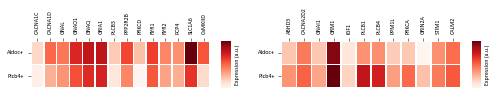

In [19]:
LTD_gene_plot()

In [20]:
data_loc = '//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Ingenuity'
def disease_plot():
    data = pd.read_excel(os.path.join(data_loc, 'Diseases.xls'))
    data = data.set_index('Stuff')
    fig, ax = plt.subplots(figsize=(5,10))
    sns.heatmap(data=data[0:20], cmap='RdBu_r', ax=ax, edgecolor='black', center=0, cbar_kws={'label':'Z-score'})
    ax.set_ylabel(' ')
    ax.set_xticklabels(['Aldoc+', 'Aldoc-'])
    fig.tight_layout()
    fig.savefig(os.path.join(output_loc, 'diseases.pdf'), bbox_inches='tight')
    
    return

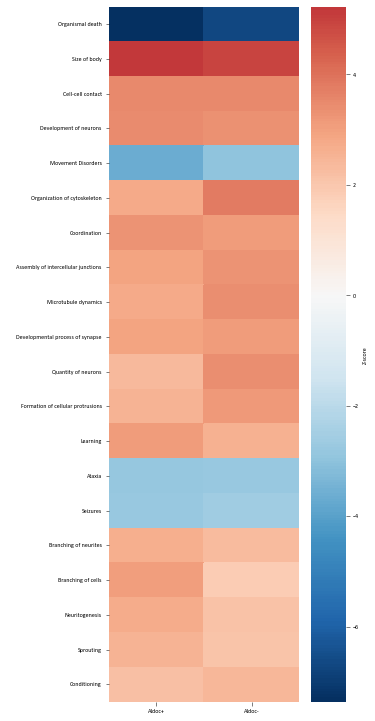

In [21]:
disease_plot()

In [22]:
data = pd.read_excel(os.path.join(data_loc, 'Diseases.xls'))
data = data.set_index('Stuff')
data = data.transpose()
data

Stuff,Organismal death,Size of body,Cell-cell contact,Development of neurons,Movement Disorders,Organization of cytoskeleton,Coordination,Assembly of intercellular junctions,Microtubule dynamics,Developmental process of synapse,...,Exchange of Ca2+,Leukemia,Development of genital tumor,Beat of muscle cells,Abnormal migration of neurons,Tumorigenesis of lymphocytes,Malignant neoplasm of connective or soft tissue of pelvis,Proliferation of bone marrow-derived mast cells,Moderate aortic regurgitation,Endometrial carcinoma
Aldoc,-7.363,5.220,3.525,3.484,-3.668,2.778,3.286,2.917,2.775,2.917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plcb4,-6.685,4.965,3.508,3.348,-2.960,3.820,3.111,3.293,3.369,3.138,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plotting single spikes

In [23]:
def read_abf(file_loc):
    a = AxonRawIO(file_loc)
    a.parse_header()
    sr = int(a.header['signal_channels'][0][2])
    data = a.get_analogsignal_chunk() * a.header['signal_channels'][0][5]
    return data[:,0], sr

In [24]:
def spike_plot():
    os.chdir('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets')
    data, sr = read_abf('spikes.ABF')
    plt.plot(data[3*sr+13500:3*sr+21500], color='black', lw=1.5)
    plt.savefig(os.path.join(output_loc, 'manyspikes.pdf'), bbox_inches='tight')
    
    return

ignoring buggy nTelegraphEnable


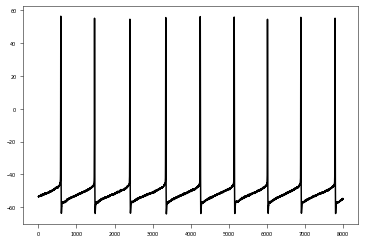

In [25]:
spike_plot()

In [26]:
def spike_plot2():
    os.chdir('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets')
    data, sr = read_abf('spikes.ABF')
    plt.plot(data[3*sr+20200:3*sr+20600], color='black', lw=1.5)
    plt.savefig(os.path.join(output_loc, 'singlespike.pdf'), bbox_inches='tight')
    
    return

ignoring buggy nTelegraphEnable


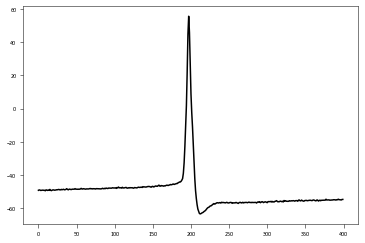

In [27]:
spike_plot2()

# GSEA

In [3]:
def gsea():
    #GSEA performed with gprofiler and top 50 genes for aldoc/plcb4 https://biit.cs.ut.ee/gprofiler/gost
    aldoc_data = pd.read_excel('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets/GSEA_Aldoc.xlsx')
    aldoc_data['logP'] = aldoc_data['logP'] * -1
    plcb4_data = pd.read_excel('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets/GSEA_Plcb4.xlsx')
    plcb4_data['logP'] = plcb4_data['logP'] * -1
    
    fig, ax = plt.subplots(1,2, gridspec_kw={'width_ratios': [2.5, 1]}, figsize=(5,2))
    sns.stripplot(x='Term',y='logP',data=aldoc_data, ax=ax[0], marker='^', color='#2E3191')
    sns.stripplot(x='Term',y='logP',data=plcb4_data, ax=ax[1], marker='^', color='#EC1C24')
    #ax[0].tick_params(axis='x', rotation=45)
    #ax[1].tick_params(axis='x', rotation=45)
    ax[0].set_xticklabels(aldoc_data.Term, rotation=45, ha='right')
    ax[1].set_xticklabels(plcb4_data.Term, rotation=45, ha='right')
    ax[0].set_ylim(0,10)
    ax[0].set_ylabel('-log10(Padj)')
    ax[0].set_xlabel('')
    ax[1].set_ylim(0,4)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')
    for a in ax.flatten():
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
    
    fig.tight_layout()
    fig.savefig(os.path.join(output_loc, 'GSEA_aldoc.pdf'), bbox_inches='tight')
    return

<ipython-input-3-600eb202ced9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(aldoc_data.Term, rotation=45, ha='right')
<ipython-input-3-600eb202ced9>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(plcb4_data.Term, rotation=45, ha='right')
<ipython-input-3-600eb202ced9>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


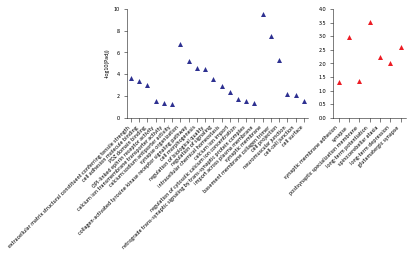

In [4]:
#Option is to maybe do something like an ID system with a lookup table?
gsea()

# GSEA 2

In [244]:
def AST(data):
    if data['P-value'] < 0.001:
        return '***'
    elif data['P-value'] < 0.01:
        return '**'
    elif data['P-value'] < 0.05:
        return '*'
    return

In [266]:
def gsea_new():
    aldoc_data = pd.read_excel('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets/EASE_Aldoc.xlsx')
    plcb4_data = pd.read_excel('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets/EASE_Plcb4.xlsx')
    aldoc_data = aldoc_data.loc[aldoc_data['Fold enrichment'] > 10]
    aldoc_data = aldoc_data.loc[aldoc_data['P-value'] < 0.05]
    plcb4_data = plcb4_data.loc[plcb4_data['P-value'] < 0.05]
    aldoc_data['AST'] = aldoc_data.apply(AST, axis=1) 
    plcb4_data['AST'] = plcb4_data.apply(AST, axis=1) 
    #aldoc_data = aldoc_data.loc[aldoc_data['P-value'] < 0.01]
    t1 = aldoc_data.Term.str.split('~', expand=True)
    aldoc_data['Pathways'] = t1[1]
    t2 = plcb4_data.Term.str.split('~', expand=True)
    plcb4_data['Pathways'] = t2[1]
    #aldoc_data = aldoc_data.loc[aldoc_data['Pathways'].str.len() < 30]
    
    fig, ax = plt.subplots(1,2, figsize=(5,2), gridspec_kw={'width_ratios': [5, 1]})
    sns.set_color_codes()
    sns.barplot(x='Pathways',y='Fold enrichment',data=aldoc_data, ax=ax[0], hue='Category', dodge=False, edgecolor='black',
               linewidth=0.5, palette=['g','b','y'])
    sns.barplot(x='Pathways',y='Fold enrichment',data=plcb4_data, ax=ax[1], hue='Category', dodge=False, edgecolor='black',
               linewidth=0.5, palette=['b','y'])

    ax[0].set_xticklabels(aldoc_data.Pathways, rotation=45, ha='right')
    ax[1].set_xticklabels(plcb4_data.Pathways, rotation=45, ha='right')
    ax[0].set_yscale('log')
    ax[1].set_yscale('log')
    for a in ax.flatten():
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.set_xlabel('')
        a.legend().set_visible(False)
    ax[0].set_ylim(0,1000)
    ax[1].set_ylim(0,100)
    fig.tight_layout()
    fig.savefig(os.path.join(output_loc, 'EASE.pdf'), bbox_inches='tight')
    return

<ipython-input-266-2557c23ea519>:32: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[0].set_ylim(0,1000)
<ipython-input-266-2557c23ea519>:33: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[1].set_ylim(0,100)
<ipython-input-266-2557c23ea519>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()


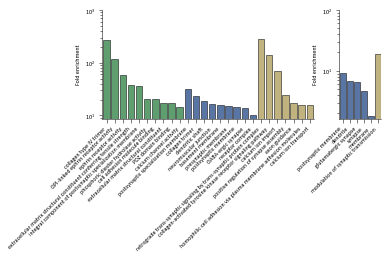

In [267]:
gsea_new()

In [257]:
aldoc_data = pd.read_excel('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets/EASE_Aldoc.xlsx')
plcb4_data = pd.read_excel('//storage/v/vcl15/ddata/NEUW/dezeeuw/Stijn Voerman/DEG Project/Datasets/EASE_Plcb4.xlsx')
aldoc_data = aldoc_data.loc[aldoc_data['Fold enrichment'] > 10]
aldoc_data = aldoc_data.loc[aldoc_data['P-value'] < 0.05]
plcb4_data = plcb4_data.loc[plcb4_data['P-value'] < 0.05]
aldoc_data['AST'] = aldoc_data.apply(AST, axis=1) 
plcb4_data['AST'] = plcb4_data.apply(AST, axis=1) 

In [258]:
aldoc_data

,Category,Term,Count,%,P-value,Genes,Fold enrichment,AST
0,MF,GO:0005587~collagen type IV trimer,4,8.333333,3.065434e-07,"COL4A2, COL4A1, COL4A6, COL4A5",264.608696,***
1,MF,GO:0005004~GPI-linked ephrin receptor activity,2,4.166667,1.627355e-02,"EPHA5, EPHA7",119.346032,*
2,MF,GO:0005003~ephrin receptor activity,2,4.166667,3.228820e-02,"EPHA5, EPHA7",59.673016,*
3,MF,GO:0030020~extracellular matrix structural con...,4,8.333333,1.585365e-04,"COL4A2, COL4A1, COL4A6, COL4A5",37.129877,***
5,MF,GO:0099060~integral component of postsynaptic ...,3,6.250000,3.076905e-03,"EPHA7, NLGN1, CDH10",35.620401,**
8,MF,GO:0008081~phosphoric diester hydrolase activity,3,6.250000,8.696522e-03,"PDE1C, MPPED2, PLCXD2",20.885556,**
9,MF,GO:0050839~cell adhesion molecule binding,4,8.333333,8.988775e-04,"KIRREL3, NLGN1, TENM2, CADM1",20.627709,***
10,MF,GO:0005201~extracellular matrix structural con...,5,10.416667,1.875901e-04,"COL4A2, COL4A1, COL4A6, COL4A5, SLIT2",17.119308,***
11,MF,GO:0030165~PDZ domain binding,5,10.416667,1.935666e-04,"KIRREL3, NLGN1, CADM1, CACNA1D, ERC2",16.980126,***
12,MF,GO:0005262~calcium channel activity,3,6.250000,1.766299e-02,"SLC24A2, TRPC4, CACNA1D",14.403831,*


In [256]:
plcb4_data

,Category,Term,Count,%,P-value,Genes,Fold enrichment,AST
0,GOTERM_CC_DIRECT,GO:0045211~postsynaptic membrane,5,10,0.001950,"GRIN2A, KCND2, DGKB, LRRC4C, KCTD16",9.118579,**
1,GOTERM_CC_DIRECT,GO:0030425~dendrite,8,16,0.000124,"BRINP1, PLCB4, KCNIP1, KCND2, SEMA3A, KLHL1, P...",6.805431,***
2,GOTERM_CC_DIRECT,GO:0098978~glutamatergic synapse,8,16,0.000177,"NTNG1, GRIN2A, PLCB4, KCND2, DGKB, SEMA3A, LRR...",6.425641,***
3,GOTERM_CC_DIRECT,GO:0045202~synapse,9,18,0.000437,"SDK1, GRIN2A, SV2C, KCND2, DGKB, RGS8, LRRC4C,...",4.703361,***
4,GOTERM_CC_DIRECT,GO:0016020~membrane,27,54,0.000157,"PPM1L, DGKB, ABHD3, TMTC2, XYLT1, EFNA5, GRIN2...",1.826960,***
5,GOTERM_BP_DIRECT,GO:0050804~modulation of synaptic transmission,5,10,0.000117,"NTNG1, GRIN2A, PLCB4, DGKB, LRRC4C",19.238311,***
